<a href="https://colab.research.google.com/github/rpdieego/IndigoTortoise-pkmn-notebooks/blob/master/IndigoTortoise_pkmn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indigo Tortoise 

**Diego Rosa**

[Linkedin](https://www.linkedin.com/in/diego-rosa-93a49810a/) | [Github](https://github.com/rpdieego) | [Medium](https://medium.com/@rsprzdieego)

[Indigo Tortoise](http://18.228.222.100/)


## Notebook Summary

*   1 - [What is Indigo Tortoise?](https://colab.research.google.com/drive/18LzTHbQnZPhSm-ehIQEepiPTqMLtG5zS#scrollTo=ncaJDBJsONk6)
*   2 - [Data Understanding](https://colab.research.google.com/drive/18LzTHbQnZPhSm-ehIQEepiPTqMLtG5zS#scrollTo=VYv_9ZgLWbRW)
*   3 - [Exploratory Data Analysis](https://colab.research.google.com/drive/18LzTHbQnZPhSm-ehIQEepiPTqMLtG5zS#scrollTo=bQtPWE6ngJ9v)
   *   3.1 - [Categorical Features](https://colab.research.google.com/drive/18LzTHbQnZPhSm-ehIQEepiPTqMLtG5zS#scrollTo=p6LOLiNHKLqE)
   *   3.2 - [Quantitative Features](https://colab.research.google.com/drive/18LzTHbQnZPhSm-ehIQEepiPTqMLtG5zS#scrollTo=bpS3QZ8rKbBq&line=1&uniqifier=1)
   *   3.3 - [Extra Features for Business Analysis](https://colab.research.google.com/drive/18LzTHbQnZPhSm-ehIQEepiPTqMLtG5zS#scrollTo=rYT6f8pXmyG7)
*   4 - [Customer Segmentation](https://colab.research.google.com/drive/18LzTHbQnZPhSm-ehIQEepiPTqMLtG5zS#scrollTo=8IzjUyOF5jy7&line=1&uniqifier=1)
*   5 - [Customer Classification](https://colab.research.google.com/drive/18LzTHbQnZPhSm-ehIQEepiPTqMLtG5zS#scrollTo=xF_1WfbENHLa)
*   6 - [Business Analysis](https://colab.research.google.com/drive/18LzTHbQnZPhSm-ehIQEepiPTqMLtG5zS#scrollTo=sU233x-2-znx&line=1&uniqifier=1)

## 1) What is Indigo Tortoise?

**The Company**

Consider a well-established company operating in the retail food sector. Presently they have around several hundred thousands of registered customers and serve almost one million consumers a year. They sell products from 5 major categories: **wines**, rare **meat** products, exotic **fruits**, specially prepared **fish** and **sweet products**. These can further be divided into  ***gold* and regular products**. The customers can order and acquire products through **3 sales channels**: **physical stores**, **catalogs** and **company’s website**. Globally, the company had **solid revenues and a healthy bottom line in the past 3 years**, but the **profit growth perspectives for the next 3 years are not promising...** For this reason, several strategic initiatives are being considered to invert this situation. One is to improve the performance of marketing activities, with a special focus on marketing campaigns.

## 2) Data Understanding

The data set contains socio-demographic and firmographic features about 2.240 customers who were contacted. Additionally, it contains a flag for those customers who responded the campaign, by buying the product. 

## Data Dictionaries

### Pokemon Dataset

*   **#** - Pokemon Index;
   *   *(Not the same used in the original franchise lists, as Mega Evolutions are list right after the pokemon on it's normal form)*
*   **Name** - Pokemon's Name;
*   **Type 1** - Pokemon's primary type;
*   **Type 2** - Pokemon's secondary type;
   *   *(All pokemons have a primary type, but not necessary a second one )*
*   **HP** - Health Points base stats;
*   **Attack** - Phisycal Attack base stats;
*   **Defense** - Phisycal Defese base stats;
*   **Sp. Atk** - Special Attack base stats;
*   **Sp. Def** - Special Defense base stats;
*   **Speed** - Speed base stats;
*   **Generation** - Which generation of the Nintendo franchise games this pokemon belongs;
*   **Legendary** - Indicates if the pokemon belong to the legendary group;
   *   *(Legendary pokemons have higher base stats, so normally they are not allowed to be used in competitive battles - there's a special category of battles where this Pokemons are allowed, called **uber** )*


---

### Combats Dataset


*   **First_Pokemon** - Trainer A's Pokémon **#** (index);
   *   *(Not the same used in the original franchise lists, as Mega Evolutions are list right after the pokemon on it's normal form)*
*   **Second_pokemon** - Trainer B's Pokémon **#** (index);
*   **Winner** - **#** (index) of the Pokémon which have won the battle;

---











###Types Dataset

Types are like 'elements' related to the Pokémon's nature. They are related in a way that, some types are strong, weak or even imune to a certain type. These atributes are used to calculate the damage the Pokémon's attack inflicts to the other Pokémon during a battle.

Untill the last generation released, the Pokémon types are:


![texto alternativo](https://github.com/rpdieego/IndigoTortoise-pkmn-notebooks/blob/master/PokemonTypes.png?raw=true)

Types dataset represents the strenght and weakness of each type. Each row represent the **Attacker** type, while the columns represent the **Defender** type. The values on each cell of the matrix represent the damage multiplier.

**Example given:** At the second row, we have a **Fire type attacking Pokémon**. Then, it's possible to check which Pokémon types a fire Pokémon is strong against checking the columns on this row. We see that fire types is very effective against **Grass**, **Ice**, **Bug** and **Steel**, while is not very effective agains **Fire**, **Water**, **Rock** and **Dragon** types.

When looking at the attacker perspective, we have four possible values for the damage multipliers:

*   **Very Effective** - Damage Multiplier: 2x;
*   **Neutral** - Damage Multiplier: 1x;
*   **Not Very Effective** - Damage Multiplier: 0.5x;
*   **Does not Affect** - Damage Multiplier: 0x;

The image below is a graphical representation of the Types Dataset content:

![texto alternativo](https://github.com/rpdieego/IndigoTortoise-pkmn-notebooks/blob/master/Types_Table.PNG?raw=true)




## 3) Exploratory Data Analysis (EDA)

In [110]:
# import relevant libraries

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [111]:
# import .csv files

pkmn_url = 'https://raw.githubusercontent.com/rpdieego/IndigoTortoise-pkmn-notebooks/master/datasets_2619_4359_pokemon.csv'
combats_url = 'https://raw.githubusercontent.com/rpdieego/IndigoTortoise-pkmn-notebooks/master/datasets_2619_4359_combats.csv'
tests_url = 'https://raw.githubusercontent.com/rpdieego/IndigoTortoise-pkmn-notebooks/master/datasets_2619_4359_tests.csv'
types_url = 'https://raw.githubusercontent.com/rpdieego/IndigoTortoise-pkmn-notebooks/master/types.csv'

pkmn_df = pd.read_csv(pkmn_url)
combats_df = pd.read_csv(combats_url)
tests_df = pd.read_csv(tests_url)
types_df = pd.read_csv(types_url)

# Checking the dimensions of each dataframe

print('Pokemon dataframe (pkmn_df): \n Features: \t {} \n Inputs: \t {}'.format(pkmn_df.shape[1], pkmn_df.shape[0]))
print('\n')
print('Combats dataframe (combats_df): \n Features: \t {} \n Inputs: \t {}'.format(combats_df.shape[1], combats_df.shape[0]))
print('\n')
print('Tests dataframe (tests_df): \n Features: \t {} \n Inputs: \t {}'.format(tests_df.shape[1], tests_df.shape[0]))
print('\n')
print('Types dataframe (types_df): \n Features: \t {} \n Inputs: \t {}'.format(types_df.shape[1], types_df.shape[0]))
print('\n')


Pokemon dataframe (pkmn_df): 
 Features: 	 12 
 Inputs: 	 800


Combats dataframe (combats_df): 
 Features: 	 3 
 Inputs: 	 50000


Tests dataframe (tests_df): 
 Features: 	 2 
 Inputs: 	 10000


Types dataframe (types_df): 
 Features: 	 19 
 Inputs: 	 18




In [112]:
# Check pkmn_df's head
pkmn_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [113]:
# Check combats_df's head
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [114]:
# Check types_df
types_df

,Type,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Normal,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
1,Fire,1,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
2,Water,1,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
3,Electric,1,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
4,Grass,1,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0
5,Ice,1,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0
6,Fighting,2,0.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,1.0,1.0,2.0,2.0,0.5
7,Poison,1,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0
8,Ground,1,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0
9,Flying,1,1.0,1.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,0.5,1.0


#### Missing Values

Checking if any of the datasets has massing values:

In [115]:
# Missing values pkmn_df
pkmn_df.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

*   There's no reason to be concerned with missing values at the *Type 2* feature, since, as mentioned before, it's not mandatory for a Pokémon to have a secondary type;
*   Besides that, I look like only one *Name* is missing - We shall check that during the data preprocessing step;

In [116]:
# Missing values combats_df
combats_df.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [117]:
# Missing values tests_df
tests_df.isnull().sum()

First_pokemon     0
Second_pokemon    0
dtype: int64

In [118]:
# Missing values types_df
types_df.isnull().sum()

Type        0
Normal      0
Fire        0
Water       0
Electric    0
Grass       0
Ice         0
Fighting    0
Poison      0
Ground      0
Flying      0
Psychic     0
Bug         0
Rock        0
Ghost       0
Dragon      0
Dark        0
Steel       0
Fairy       0
dtype: int64

#### 3.1) Pokémons by type

*   How many Pokémons have a secondary type?
*   Which is is most common primary type? How about the secondary?
*   Generally speaking, which is the most common type?
*   How about legendary Pokémon? Which are the most common types among them?

In [119]:
def check_type_entries(list_1,list2):
  '''

  '''
  check = list(set(list_1).symmetric_difference(list2))
  if len(check) == 0:
    print('Elements on both lists match')
  else:
    print('These elements dont match! \n {} '.format(check))


In [120]:
#Check there are no fake / wrong entries on the types data
type1_list = pkmn_df['Type 1'].unique()
type2_list = pkmn_df[pkmn_df['Type 2'].isnull() == False]['Type 2'].unique()
types_list = np.array(types_df['Type'])

for l in [type1_list, type2_list]:
  print('\n Check Type list: {} \n'.format(l))
  check_type_entries(types_list,l)
 


 Check Type list: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying'] 

Elements on both lists match

 Check Type list: ['Poison' 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting' 'Psychic'
 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost' 'Bug'
 'Normal'] 

Elements on both lists match


*   Both *Type 1* and *Type 2* features have no typos or wrong entries

##### 3.1.1) How many Pokémons have a secondary type?

In [121]:
# How many Pokémon have a secondary type?

type2_rate = (pkmn_df[pkmn_df['Type 2'].isnull() == False].shape[0] / pkmn_df.shape[0])*100
print('{:.2f} % of the Pokémon has a secondary type'.format(type2_rate))


51.75 % of the Pokémon has a secondary type


3.1.2) Which is is most common primary type? How about the secondary?

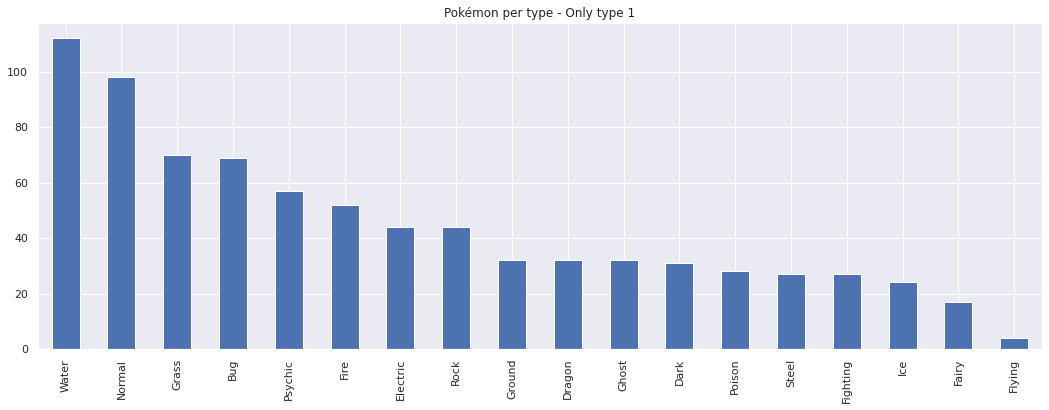

In [122]:
sns.set()
# Most common Type 1
type1_qnt = pkmn_df['Type 1'].value_counts()
plt.figure(figsize =(18,6));
plt.title('Pokémon per type - Only type 1');
type1_qnt.plot.bar();


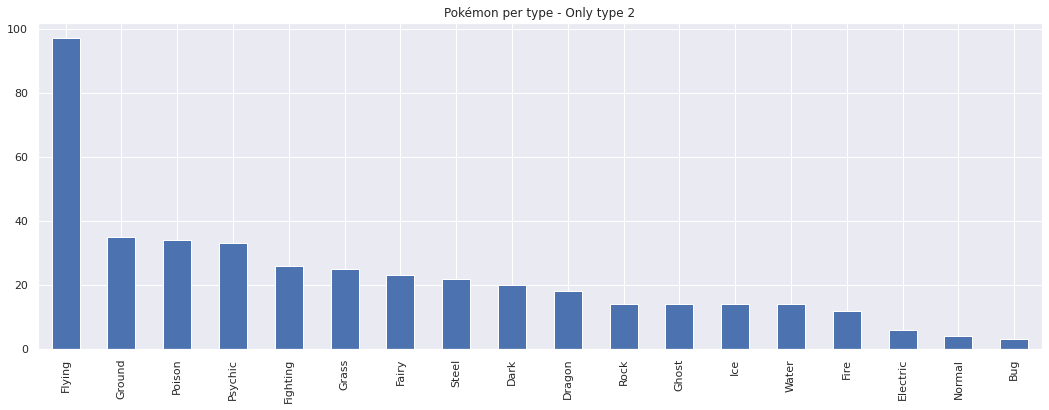

In [123]:
# Most common Type 1
type2_qnt = pkmn_df['Type 2'].value_counts()
plt.figure(figsize =(18,6));
plt.title('Pokémon per type - Only type 2');
type2_qnt.plot.bar();

Interesting to see that the less common primeiry type, *Flying*, is the most common secondary type.

3.1.3) Generally speaking, which is the most common type?

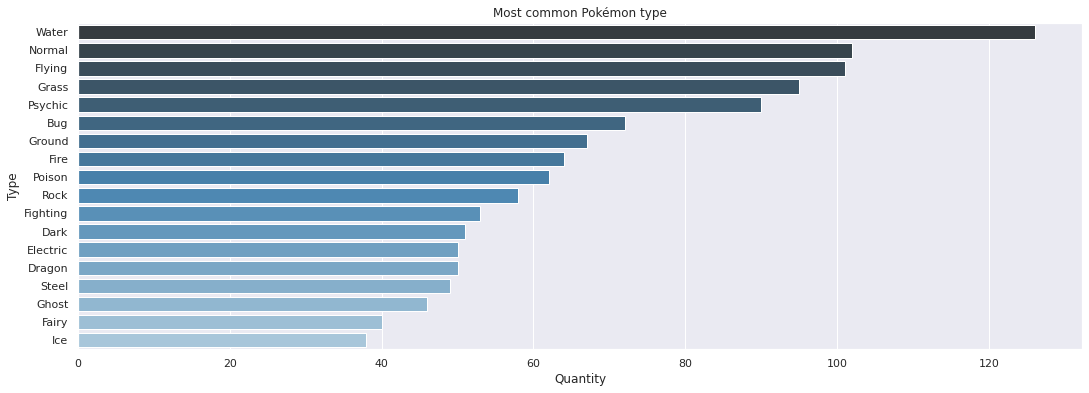

In [124]:
# Most common types

type2_qnt.reindex(type1_qnt.index)
type_qnt = (type1_qnt + type2_qnt).sort_values(ascending=False)
plt.figure(figsize =(18,6));
plt.title('Most common Pokémon type');
plt.xlabel('Quantity')
plt.ylabel('Type')
ax = sns.barplot(y=type_qnt.index, x=type_qnt.values, palette = "Blues_d");



##### 3.1.4) How about legendary Pokémon? Which are the most common types among them?

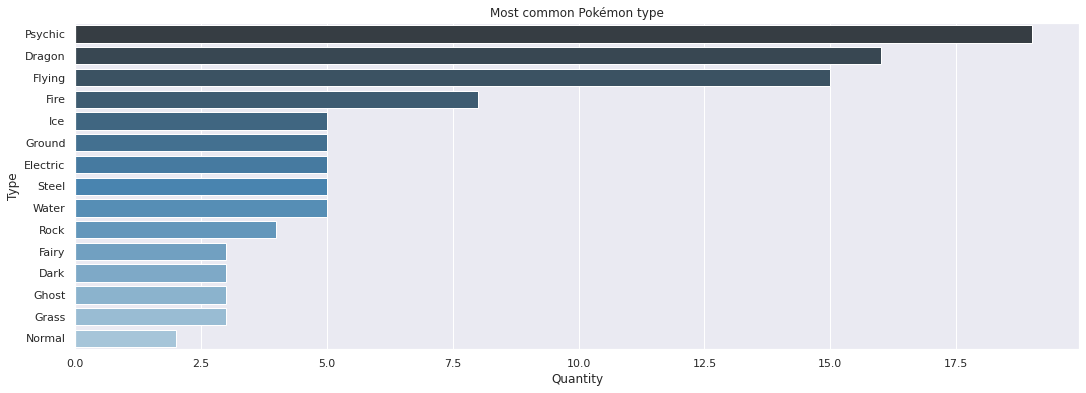

In [125]:
lgd_type1_qnt = pkmn_df[pkmn_df['Legendary'] == True]['Type 1'].value_counts()
lgd_type2_qnt = (pkmn_df[pkmn_df['Legendary'] == True]['Type 2'].value_counts()).reindex(lgd_type1_qnt.index).fillna(0)
lgd_type_qnt = (lgd_type1_qnt + lgd_type2_qnt).sort_values(ascending=False)

plt.figure(figsize =(18,6));
plt.title('Most common Pokémon type');
plt.xlabel('Quantity')
plt.ylabel('Type')
ax = sns.barplot(y=lgd_type_qnt.index, x=lgd_type_qnt.values, palette = "Blues_d");

In [126]:
# Which types have no representant among the legendary pokemon?
check_type_entries(types_list,lgd_type_qnt.index)

These elements dont match! 
 ['Fighting', 'Bug', 'Poison'] 


#### 3.2) Status by type

*   Which status is, in average, the strongest in terms of base stats?
*   Which type is the best, in average, at each stat?
*   Which is strongest characteristic of each type in respect to it's average stats? ( example given: Phisycal Attacker, Special Defender, High Speed, etc)

In [127]:
def average_stats(stats_list):
  '''
  INPUT  (stats_list) - List of all pokemon stats

  OUTPUT (avg_status) - List containing average value of each stat for
                        the whole pokemon set
  '''  
  avg_status = []
  for stat in stats_list:
    avg = pkmn_df[stat].mean()
    avg_status.append(avg)

  return avg_status

In [128]:
def average_stats_per_type(type_list, stats_list):
  '''
  INPUT (type_list) - List of all pokemon types
        (stats_list) - List of all pokemon stats

  OUTPUT (avg_status) - List containing one list per pokemon type, where
                        each list contains the average value of each stat
                        for that specific pokemon type
  '''

  #List containing list of all average stats per type
  avg_status = []
  #iterate through all types
  for t in type_list:
    # List of average status for type "t"
    avg_status_type = []
    #iterate through all stats
    for stat in stats_list:
      #querry average status from original dataset
      avg = pkmn_df[(pkmn_df['Type 1'] == t) 
                  | (pkmn_df['Type 2'] == t)][stat].mean()
      avg_status_type.append(avg)
    avg_status.append(avg_status_type)
  
  return avg_status

In [129]:
def average_stat_type_plot(avg_types_stats, stat_list, type_list, avg_status, stat):
  '''
  INPUT (avg_types_stats) - List containing one list per pokemon type, where
                            each list contains the average value of each stat
                            for that specific pokemon type
        (stat_list) - List of all pokemon stats
        (type_list) - List of all pokemon types
        (avg_status) - Average value of each status considering the whole pokemon
                       set
        (stat) - Integer value indication which status of stat_list shall be
                 plotted

  OUTPUT - none

  This function plots a bargraph of average values of the inputed stat for
  all the pokemon types ordered from highest to lowest, and highlight with a
  red line the general average value, with a green line the higest value and
  with a gray line the lowest value for that stat;

  '''

  avg_list_stat = []
  for i in range(len(avg_types_stats)):  
    stat_value = avg_types_stats[i][stat]
    avg_list_stat.append((types_list[i],stat_value))

  # sort values
  avg_list_stat.sort(key=lambda x: x[1], reverse=True)

  plt.figure(figsize =(18,6));
  plt.title('Average {} Stats per Type'.format(stat_list[stat]));
  plt.xlabel('Type')
  plt.ylabel('Average {} Value'.format(stat_list[stat]))
  sns.barplot(x=[i[0] for i in avg_list_stat], y=[i[1] for i in avg_list_stat], palette = "Blues_d");
  plt.axhline(avg_status[stat], c='red', label='Total Average');
  plt.axhline(avg_list_stat[-1][1], c='gray', label='Smallest Average {} '.format(stat_list[stat]));
  plt.axhline(avg_list_stat[0][1], c='green', label='Highest Average{} '.format(stat_list[stat]));
  # Put a legend below current axis
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
        fancybox=True, shadow=True, ncol=3)  

In [130]:
def plot_radar_charts_3x3(avg_types_stats_rdr, types_list):
  '''
  INPUT - (avg_types_stats_rdr) - List containing lists of average stats per
                                  type (len = 9);
          (types_list) - List of all types (same order as avg_types_stats_rdr);

  OUTPUT - None

  This function plots a matrix 3x3 of radar charts showing average stats per
  type;

  '''
  #Split Stats per type
  data1 = avg_types_stats_rdr[0]
  data2 = avg_types_stats_rdr[1]
  data3 = avg_types_stats_rdr[2]
  data4 = avg_types_stats_rdr[3]
  data5 = avg_types_stats_rdr[4]
  data6 = avg_types_stats_rdr[5]
  data7 = avg_types_stats_rdr[6]
  data8 = avg_types_stats_rdr[7]
  data9 = avg_types_stats_rdr[8]

  # Get angles from 0 to 360 and concatenate first element to make it a full circle
  angles=np.linspace(0, 2*np.pi, len(stats_list), endpoint=False) 
  angles=np.concatenate((angles,[angles[0]]))

  # Concat first element of data points to the end to make it full circle
  # ========= Type 1 ========================
  stats1=np.concatenate((data1,[data1[0]]))
  # ========= Type 2 ========================
  stats2=np.concatenate((data2,[data2[0]]))
  # ========= Type 3 ========================
  stats3=np.concatenate((data3,[data3[0]]))
  # ========= Type 4 ========================
  stats4=np.concatenate((data4,[data4[0]]))
  # ========= Type 5 ========================
  stats5=np.concatenate((data5,[data5[0]]))
  # ========= Type 6 ========================
  stats6=np.concatenate((data6,[data6[0]]))
  # ========= Type 7 ========================
  stats7=np.concatenate((data7,[data7[0]]))
  # ========= Type 7 ========================
  stats8=np.concatenate((data8,[data8[0]]))
  # ========= Type 8 ========================
  stats9=np.concatenate((data9,[data9[0]]))

  # Radar chart
  fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3,3, subplot_kw=dict(projection='polar'), figsize = (24,20))

  # Titles
  plt.suptitle('Radar Charts per Type')
  plt.sca(ax1)
  plt.title(types_list[0])
  plt.sca(ax2)
  plt.title(types_list[1])
  plt.sca(ax3)
  plt.title(types_list[2])
  plt.sca(ax4)
  plt.title(types_list[3])
  plt.sca(ax5)
  plt.title(types_list[4])
  plt.sca(ax6)
  plt.title(types_list[5])
  plt.sca(ax7)
  plt.title(types_list[6])
  plt.sca(ax8)
  plt.title(types_list[7])
  plt.sca(ax9)
  plt.title(types_list[8])

  #Set max value of average max stats to 120
  max_val = [120,120,120,120,120,120,120]

  # Plot each axis
  ax1.plot(angles, stats1, "o-")
  ax1.plot(angles, max_val, ".:")
  ax1.fill(angles, stats1, alpha=0.25)
  ax1.set_thetagrids(angles * 180/np.pi, stats_list)   

  ax2.plot(angles, stats2, "o-")
  ax2.plot(angles, max_val, ".:")
  ax2.fill(angles, stats2, alpha=0.25)
  ax2.set_thetagrids(angles * 180/np.pi, stats_list) 

  ax3.plot(angles, stats3, "o-")
  ax3.plot(angles, max_val, ".:")
  ax3.fill(angles, stats3, alpha=0.25)
  ax3.set_thetagrids(angles * 180/np.pi, stats_list)

  ax4.plot(angles, stats4, "o-")
  ax4.plot(angles, max_val, ".:")
  ax4.fill(angles, stats4, alpha=0.25)
  ax4.set_thetagrids(angles * 180/np.pi, stats_list)   

  ax5.plot(angles, stats5, "o-")
  ax5.plot(angles, max_val, ".:")
  ax5.fill(angles, stats5, alpha=0.25)
  ax5.set_thetagrids(angles * 180/np.pi, stats_list) 

  ax6.plot(angles, stats6, "o-")
  ax6.plot(angles, max_val, ".:")
  ax6.fill(angles, stats6, alpha=0.25)
  ax6.set_thetagrids(angles * 180/np.pi, stats_list)

  ax7.plot(angles, stats7, "o-")
  ax7.plot(angles, max_val, ".:")
  ax7.fill(angles, stats7, alpha=0.25)
  ax7.set_thetagrids(angles * 180/np.pi, stats_list)   

  ax8.plot(angles, stats8, "o-")
  ax8.plot(angles, max_val, ".:")
  ax8.fill(angles, stats8, alpha=0.25)
  ax8.set_thetagrids(angles * 180/np.pi, stats_list) 

  ax9.plot(angles, stats9, "o-")
  ax9.plot(angles, max_val, ".:")
  ax9.fill(angles, stats9, alpha=0.25)
  ax9.set_thetagrids(angles * 180/np.pi, stats_list)

  plt.show()

In [131]:
#List of all stats
stats_list = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

#Average value of each status for all the pokemon
avg_status = average_stats(stats_list)

#Average stats for each type
avg_types_stats = average_stats_per_type(types_list, stats_list)

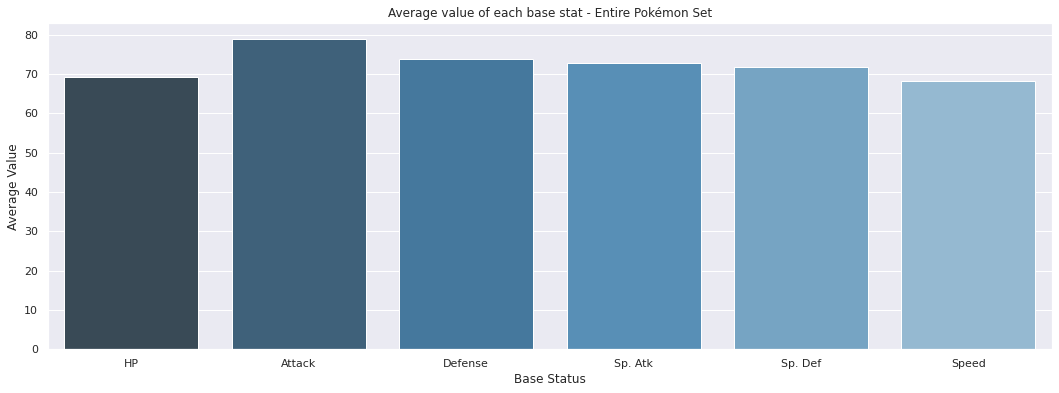

In [132]:
# Plot average of each base stat
plt.figure(figsize =(18,6));
plt.title('Average value of each base stat - Entire Pokémon Set');
plt.xlabel('Base Status')
plt.ylabel('Average Value')
sns.barplot(x=stats_list, y=avg_status, palette = "Blues_d" );

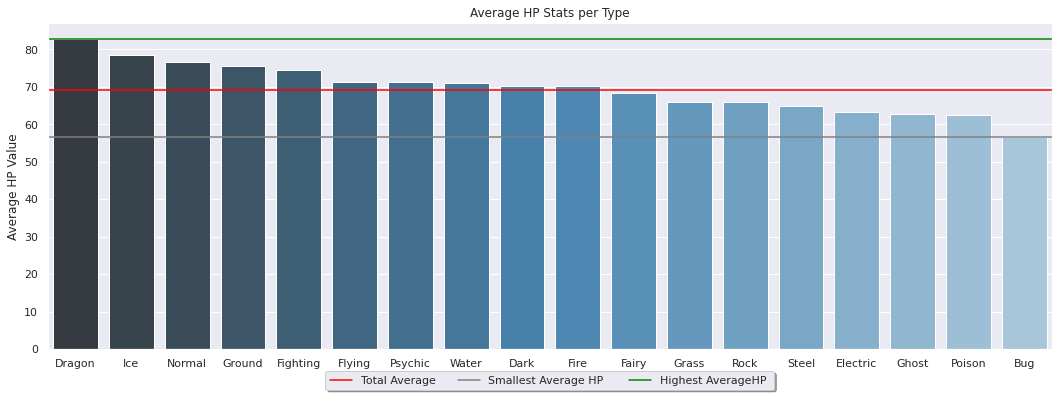

In [133]:
# Average HP per type
average_stat_type_plot(avg_types_stats, stats_list, types_list, avg_status, 0 )

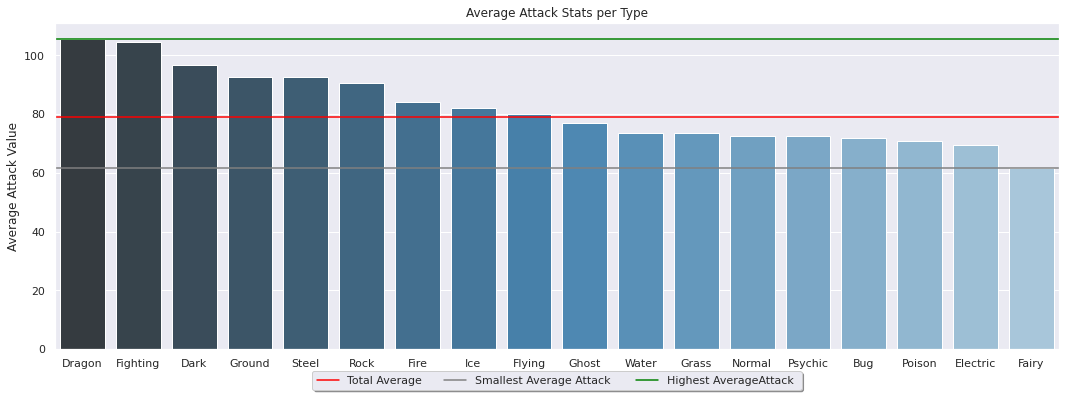

In [134]:
# Average Attack per type
average_stat_type_plot(avg_types_stats, stats_list, types_list, avg_status, 1 )

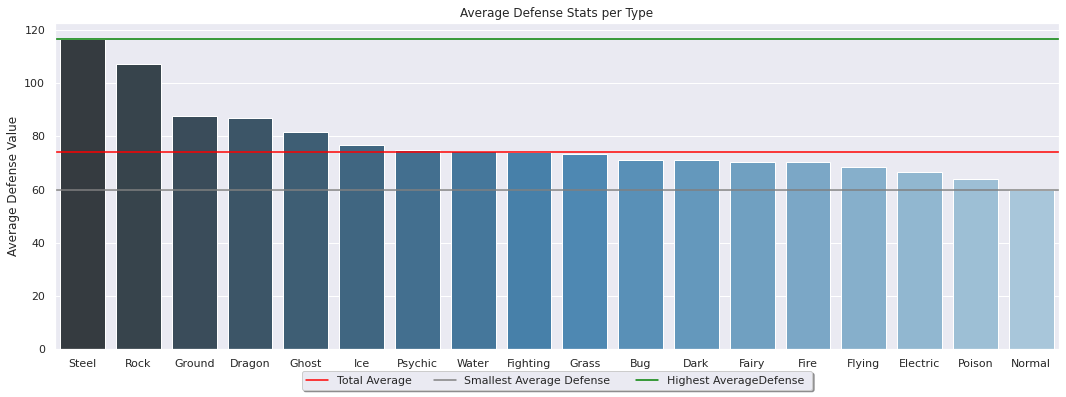

In [135]:
# Average Defense per type
average_stat_type_plot(avg_types_stats, stats_list, types_list, avg_status, 2 )

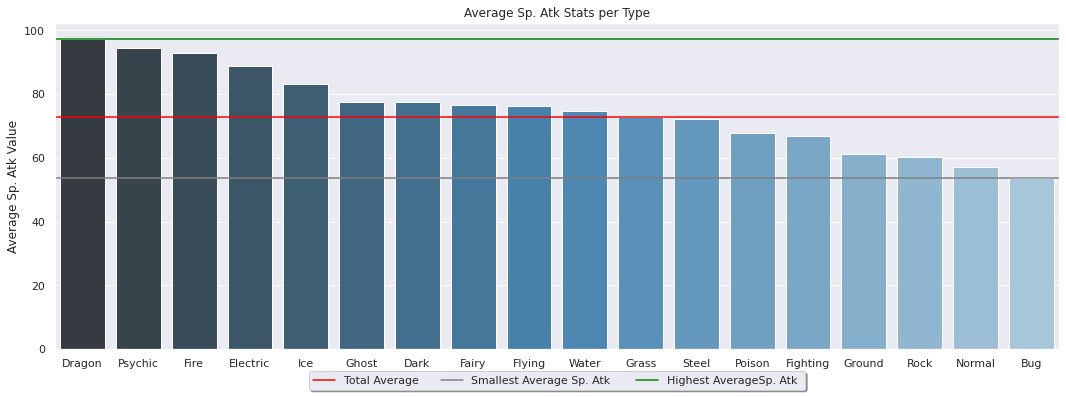

In [136]:
# Average Special Attack per type
average_stat_type_plot(avg_types_stats, stats_list, types_list, avg_status, 3 )

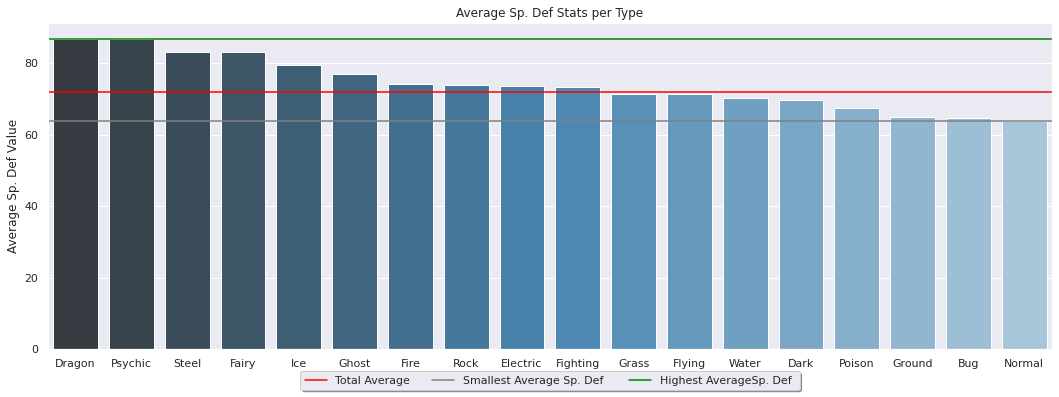

In [137]:
# Average Special Defense per type
average_stat_type_plot(avg_types_stats, stats_list, types_list, avg_status, 4 )

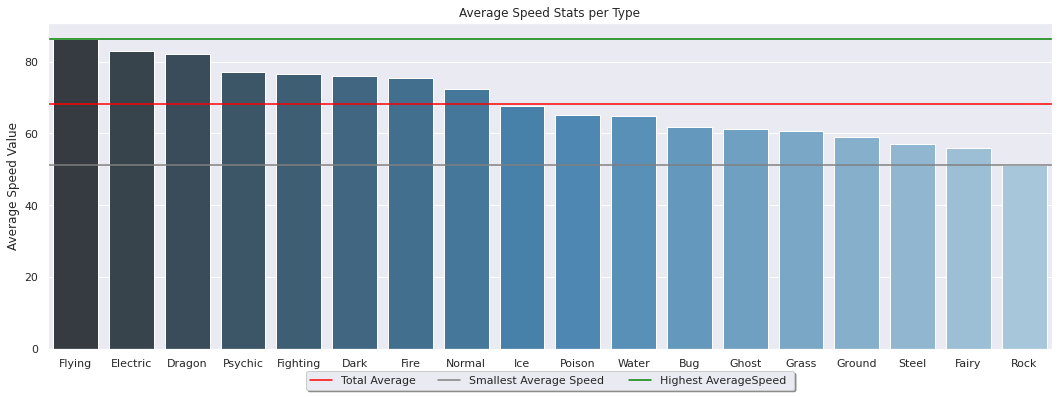

In [138]:
# Average Speed per type
average_stat_type_plot(avg_types_stats, stats_list, types_list, avg_status, 5 )

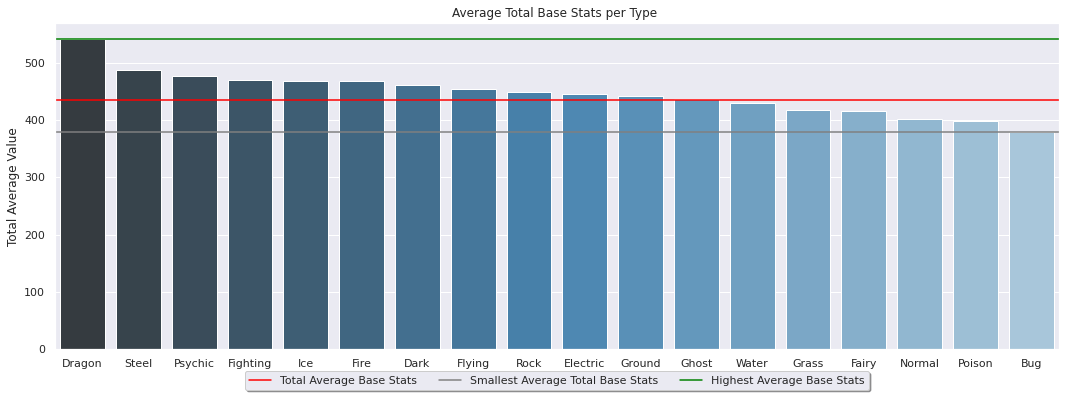

In [139]:
# Average Total Base Stats per Type 
sum_avg = []
for i in range(len(avg_types_stats)):
  sum_stats = sum(avg_types_stats[i])
  sum_avg.append((types_list[i],sum_stats))

# sort values
sum_avg.sort(key=lambda x: x[1], reverse=True)

# find weakest type
weakest_type = min(sum_avg)

# find strongest type
strongest_type = max(sum_avg)

# general average
total_avg = sum(avg_status)

plt.figure(figsize =(18,6));
plt.title('Average Total Base Stats per Type ');
plt.xlabel('Base Status')
plt.ylabel('Total Average Value')
sns.barplot(x=[i[0] for i in sum_avg], y=[i[1] for i in sum_avg], palette = "Blues_d" );

plt.axhline(total_avg, c='red', label='Total Average Base Stats');
plt.axhline(sum_avg[-1][1], c='gray', label='Smallest Average Total Base Stats');
plt.axhline(sum_avg[0][1], c='green', label='Highest Average Base Stats');
# Put a legend below current axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
      fancybox=True, shadow=True, ncol=3);


#### Interesting Points:
---
*  There are only six types among the eighteen that have average sum of stats smaller than the general average:
   *   **Water**: 429.09;
   *   **Grass**: 417.93;
   *   **Fairy**: 415.93;
   *   **Normal**: 402.07;
   *   **Poison**: 397.69;
   *   **Bug** : 379.53;

   Hence, this types could be considere, in average, the weakest types in the Pokémon world - and there's some reasoning on it:
   *  5 out of the 6 weakest types are among the top 10 most common types (only **Fairy** is out of this list - being the second most rare type **[note - fairy is the newest type of the franchise, being introduced only at Generation VI]**;
   *  **Water**, **Normal** and **Grass** types place respectively 1st, 2nd and 4th spot on the most common pokemon types (3rd is occupied by *Flying* type - which is used most as a secondary type as it has been shown on section 3.1.2);

---

*   Looking at the top six types when the metric is the average sum of stats, we have:
   *   **Dragon**: 541.76;
   *   **Steel**: 486.59;
   *   **Psychic**: 477.08;
   *   **Fighting**: 470.11;
   *   **Ice**: 467.44;
   *   **Fire**: 467.11;

   Also here, we can see some reasoning:
   * 3 of the most powerfull types are on the top 5 most rare: **Ice**, **Steel** and **Dragon**;
   * **Psychic** is the most common type for legendary pokemon, quite confortably;
   * The only type on this list that isn't on the top 6 most common type of legendary Pokémon is **Fighting** (actually, there are no legendary pokémon of this type, as we have seen on the last section) - however, this is the eighth most rare Pokémon type;









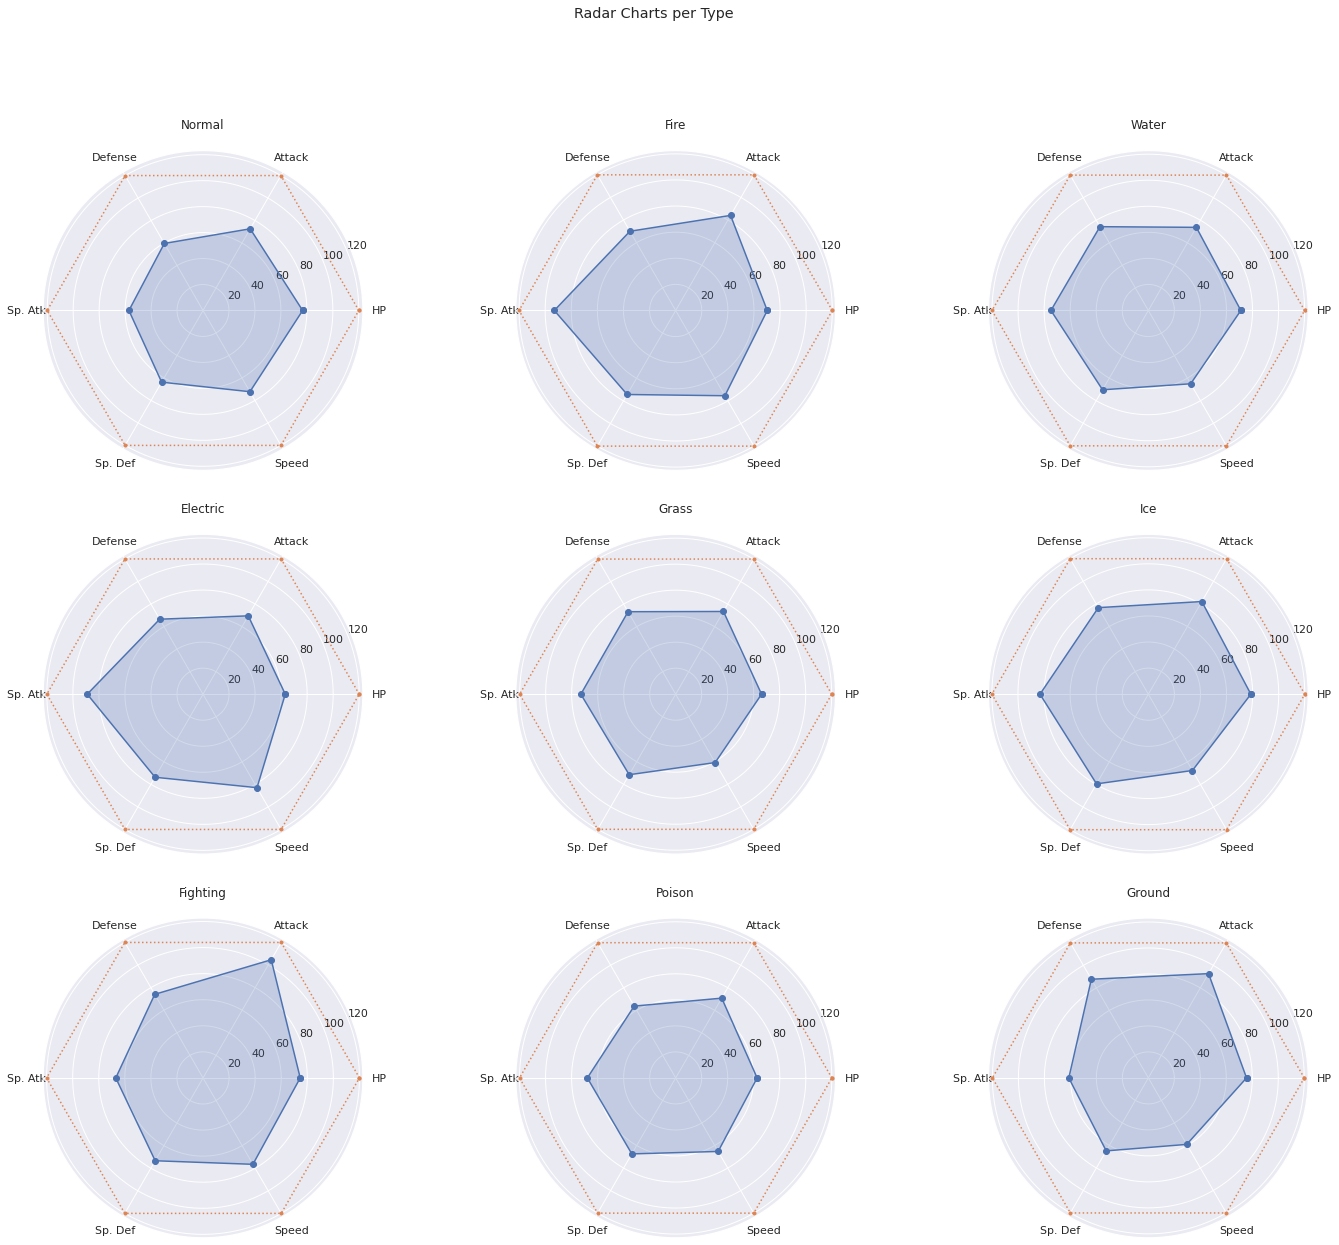

In [140]:
# Plot Radar Charts for the first 9 Types
plot_radar_charts_3x3(avg_types_stats[0:9], types_list)

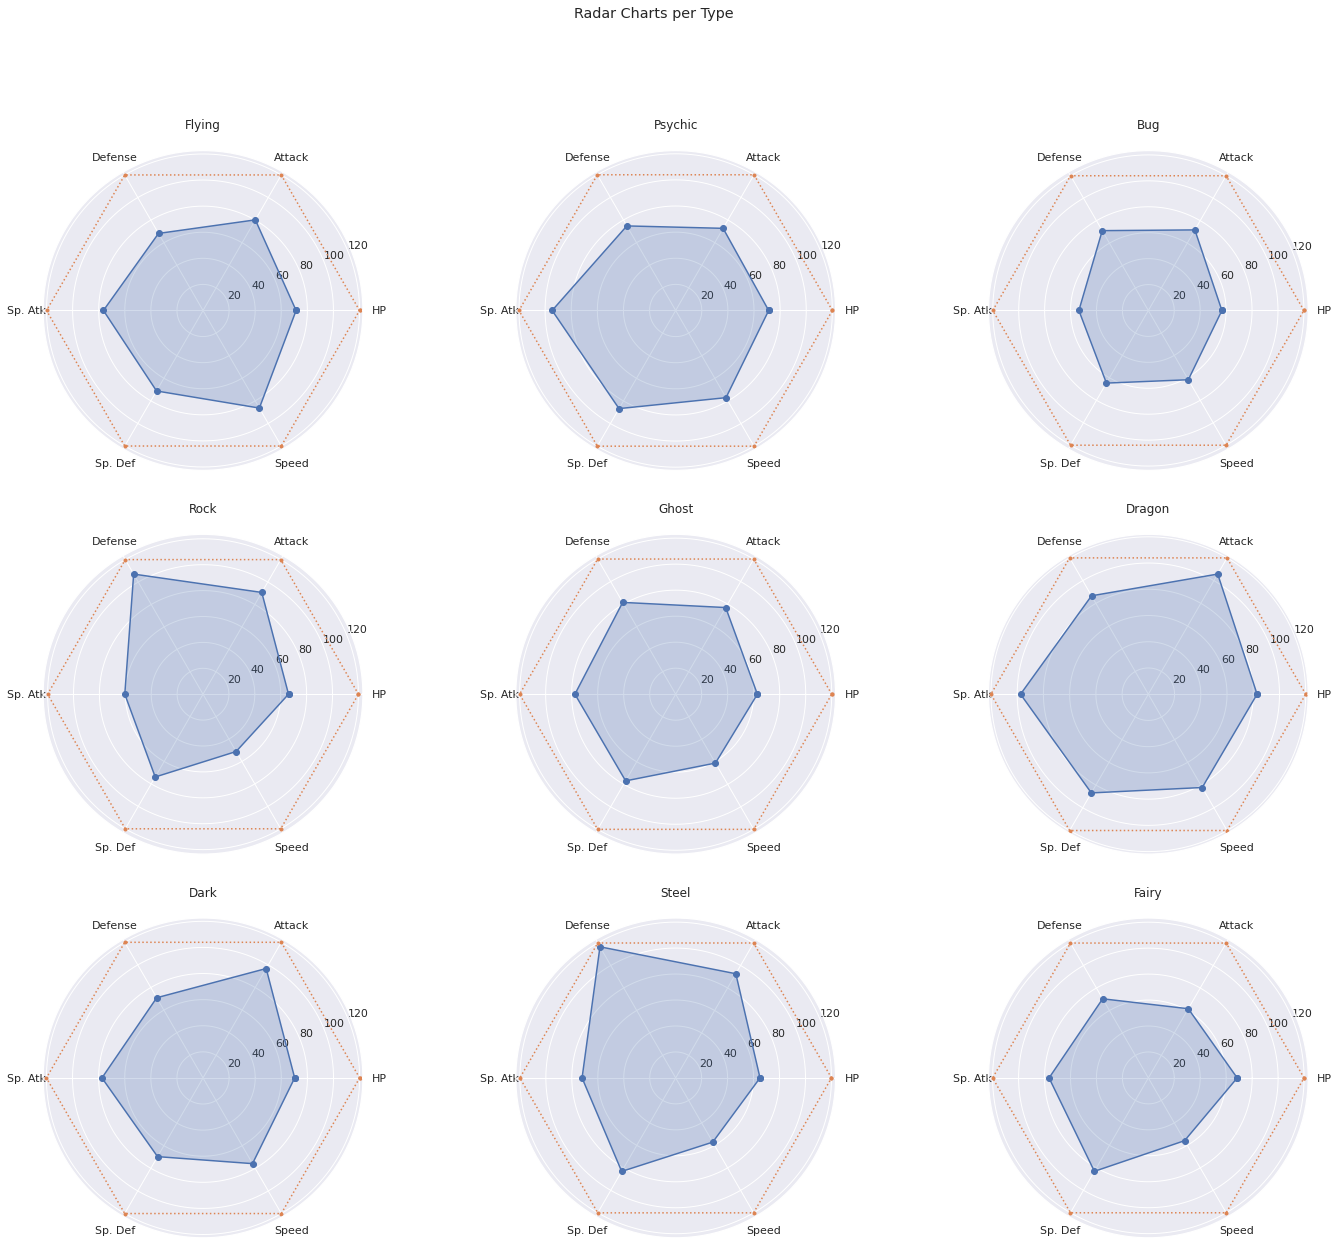

In [141]:
# Plot Radar Charts for the last 9 Types
plot_radar_charts_3x3(avg_types_stats[9:18], types_list[9:18])

#### 3.3) Generation Characteristics

*   Is there a "strongest" generation in terms of base stats?

In [154]:
avg_stats_per_generation = []
for stat in stats_list:
  avg_sts_values = pkmn_df.groupby('Generation')[stat].mean()
  avg_stats_per_generation.append(avg_sts_values.values)

In [163]:
def stats_per_generation_list(avg_stats_per_generation, gen):
  '''
  INPUT - (avg_stats_per_generation) - List of lists containing the generation
                                       average value of each status
          (gen) - Generation to extract data (integer: # gen - 1)

  OUTPUT - (gen_stats) - List of average status for generation (gen) ordered as:
                        ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
                        
  '''
  gen_stats = []
  for i in range(len(avg_stats_per_generation)):
    gen_stats.append(avg_stats_per_generation[i][gen])

  return gen_stats

In [211]:
def stats_per_generation_plot(avg_stats_per_generation, avg_status, stats_list):

  # Extract data per generation
  gen_1_avg_stats = stats_per_generation_list(avg_stats_per_generation, 0)
  gen_2_avg_stats = stats_per_generation_list(avg_stats_per_generation, 1)
  gen_3_avg_stats = stats_per_generation_list(avg_stats_per_generation, 2)
  gen_4_avg_stats = stats_per_generation_list(avg_stats_per_generation, 3)
  gen_5_avg_stats = stats_per_generation_list(avg_stats_per_generation, 4)
  gen_6_avg_stats = stats_per_generation_list(avg_stats_per_generation, 5)

  # Get angles from 0 to 360 and concatenate first element to make it a full circle
  angles=np.linspace(0, 2*np.pi, len(stats_list), endpoint=False) 
  angles=np.concatenate((angles,[angles[0]]))

  # Concat first element of data points to the end to make it full circle
  # ========= Gen 1 ========================
  stats1=np.concatenate((gen_1_avg_stats,[gen_1_avg_stats[0]]))
  # ========= Gen 2 ========================
  stats2=np.concatenate((gen_2_avg_stats,[gen_2_avg_stats[0]]))
  # ========= Gen 3 ========================
  stats3=np.concatenate((gen_3_avg_stats,[gen_3_avg_stats[0]]))
  # ========= Gen 4 ========================
  stats4=np.concatenate((gen_4_avg_stats,[gen_4_avg_stats[0]]))
  # ========= Gen 5 ========================
  stats5=np.concatenate((gen_5_avg_stats,[gen_5_avg_stats[0]]))
  # ========= Gen 6 ========================
  stats6=np.concatenate((gen_6_avg_stats,[gen_6_avg_stats[0]]))

  # ========= General Average ==============
  stats0=np.concatenate((avg_status,[avg_status[0]]))

  #Set max value of average max stats to 80
  max_val = [80,80,80,80,80,80,80]

  # Radar chart
  fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, subplot_kw=dict(projection='polar'), figsize = (24,20))

  # Titles
  plt.suptitle('Radar Charts per Generation')
  plt.sca(ax1)
  plt.title('Generation 1')
  plt.sca(ax2)
  plt.title('Generation 2')
  plt.sca(ax3)
  plt.title('Generation 3')
  plt.sca(ax4)
  plt.title('Generation 4')
  plt.sca(ax5)
  plt.title('Generation 5')
  plt.sca(ax6)
  plt.title('Generation 6')

  # Plot each axis 
  ax1.plot(angles, stats0, "o-", label='General Average')
  ax1.plot(angles, stats1, "o-")
  ax1.plot(angles, max_val, ".:")
  ax1.fill(angles, stats0, alpha=0.1)
  ax1.fill(angles, stats1, alpha=0.25)
  ax1.set_thetagrids(angles * 180/np.pi, stats_list) 

  ax2.plot(angles, stats0, "o-", label='General Average')
  ax2.plot(angles, stats2, "o-")
  ax2.plot(angles, max_val, ".:")
  ax2.fill(angles, stats0, alpha=0.1)
  ax2.fill(angles, stats2, alpha=0.25)
  ax2.set_thetagrids(angles * 180/np.pi, stats_list) 

  ax3.plot(angles, stats0, "o-", label='General Average')
  ax3.plot(angles, stats3, "o-")
  ax3.plot(angles, max_val, ".:")
  ax3.fill(angles, stats0, alpha=0.1)
  ax3.fill(angles, stats3, alpha=0.25)
  ax3.set_thetagrids(angles * 180/np.pi, stats_list) 

  ax4.plot(angles, stats0, "o-", label='General Average')
  ax4.plot(angles, stats4, "o-")
  ax4.plot(angles, max_val, ".:")
  ax4.fill(angles, stats0, alpha=0.1)
  ax4.fill(angles, stats4, alpha=0.25)
  ax4.set_thetagrids(angles * 180/np.pi, stats_list) 

  ax5.plot(angles, stats0, "o-", label='General Average')
  ax5.plot(angles, stats5, "o-")
  ax5.plot(angles, max_val, ".:")
  ax5.fill(angles, stats0, alpha=0.1)
  ax5.fill(angles, stats5, alpha=0.25)
  ax5.set_thetagrids(angles * 180/np.pi, stats_list) 

  ax6.plot(angles, stats0, "o-", label='General Average')
  ax6.plot(angles, stats6, "o-")
  ax6.plot(angles, max_val, ".:")
  ax6.fill(angles, stats0, alpha=0.1)
  ax6.fill(angles, stats6, alpha=0.25)
  ax6.set_thetagrids(angles * 180/np.pi, stats_list) 

  legend_label = ['General Average', 'Generation Average']

  ax1.legend(legend_label, loc='upper center', bbox_to_anchor=(0.5, -0.05),
      fancybox=True, shadow=True, ncol=3);
  
  ax2.legend(legend_label, loc='upper center', bbox_to_anchor=(0.5, -0.05),
      fancybox=True, shadow=True, ncol=3);

  ax3.legend(legend_label, loc='upper center', bbox_to_anchor=(0.5, -0.05),
      fancybox=True, shadow=True, ncol=3);

  ax4.legend(legend_label, loc='upper center', bbox_to_anchor=(0.5, -0.05),
      fancybox=True, shadow=True, ncol=3);

  ax5.legend(legend_label, loc='upper center', bbox_to_anchor=(0.5, -0.05),
      fancybox=True, shadow=True, ncol=3);

  ax6.legend(legend_label, loc='upper center', bbox_to_anchor=(0.5, -0.05),
      fancybox=True, shadow=True, ncol=3);
      
  plt.show();


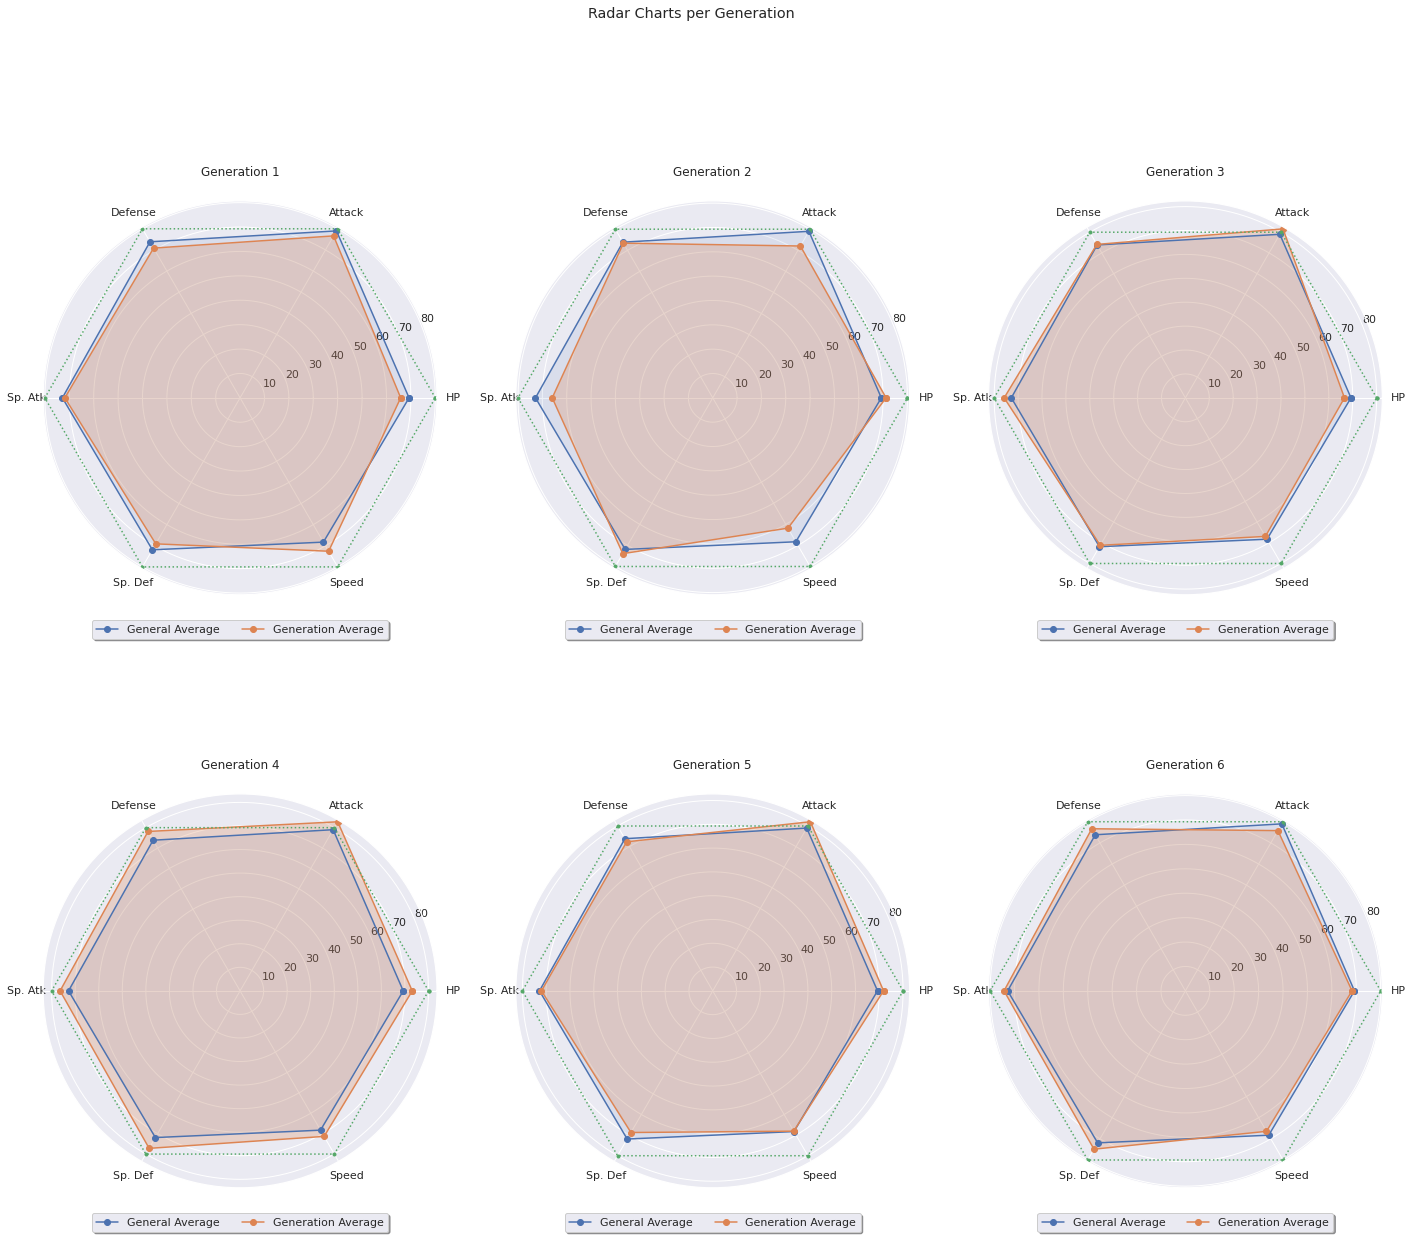

In [212]:
stats_per_generation_plot(avg_stats_per_generation, avg_status, stats_list)

In [213]:
pkmn_df.groupby('Generation')['Legendary'].sum()

Generation
1     6.0
2     5.0
3    18.0
4    13.0
5    15.0
6     8.0
Name: Legendary, dtype: float64